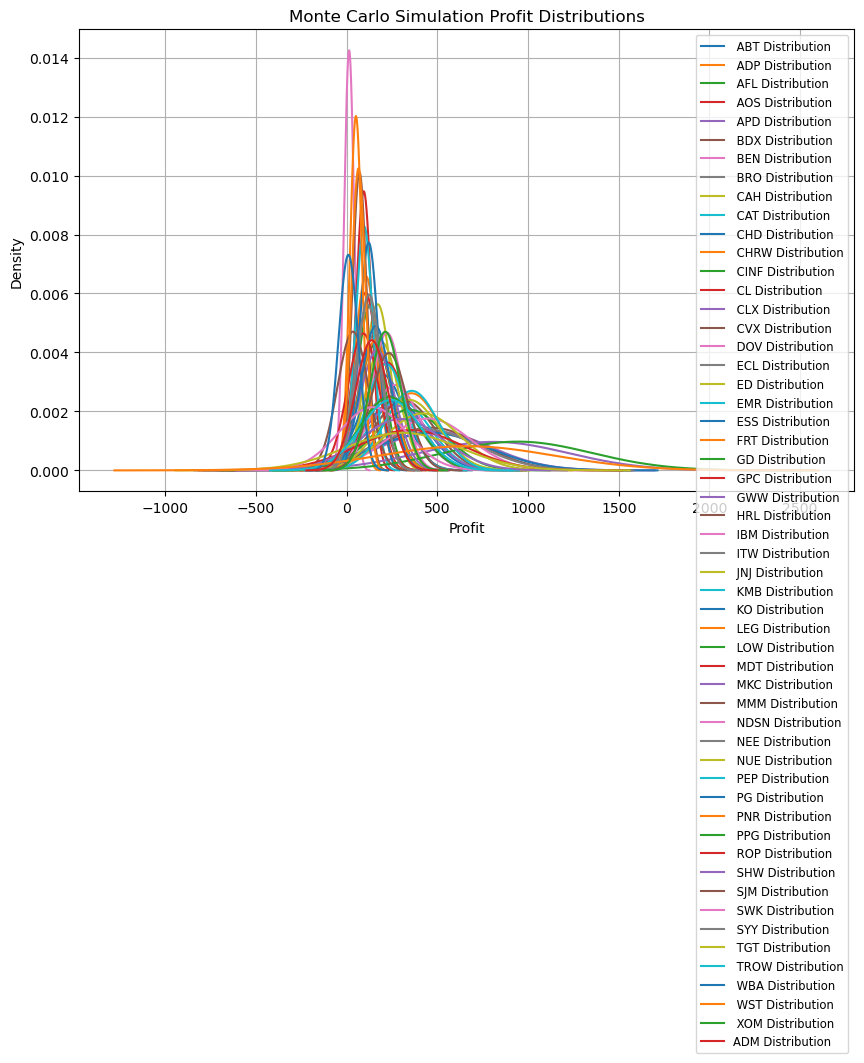

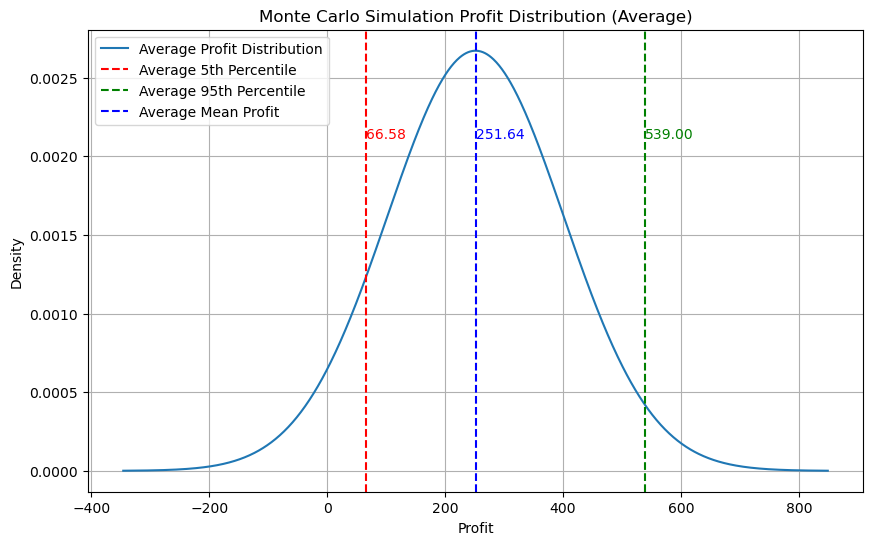

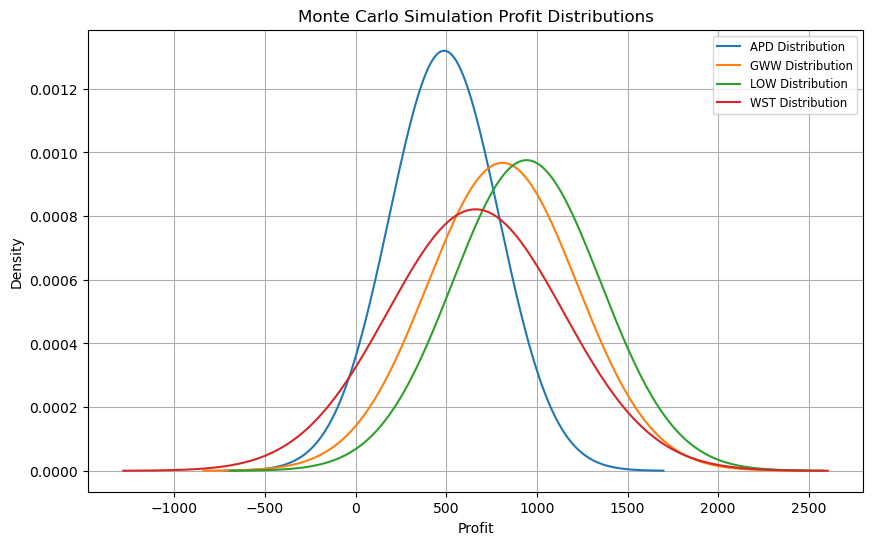

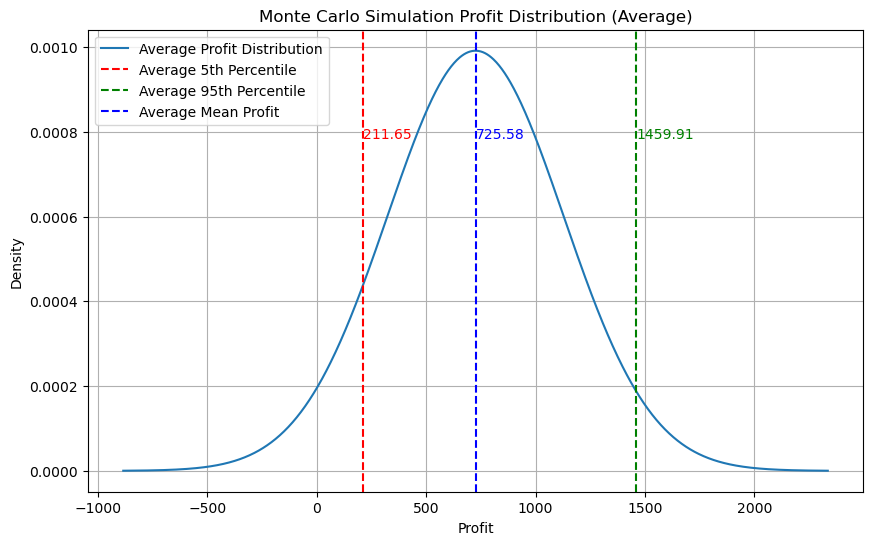

In [21]:
# DCS OPTIMAL: MAX PROFIT

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# Load and clean the data
dcs_mc = pd.read_excel("dcs_mc.xlsx", skiprows=1)

dcs_mc.columns = ['Unnamed', 'Idx', 'Measure', 'Profit', 'Symbol']
dcs_mc.drop(columns=['Unnamed', 'Idx'], inplace=True)
df_pivot = dcs_mc.pivot(index='Symbol', columns='Measure', values='Profit')
df_pivot.reset_index(inplace=True)
#print(df_pivot)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df_pivot.iterrows():
    mean_profit = row['Mean Profit']
    std_dev_profit = row['Standard Deviation of Profit']
    percentile_5th = row['5th Percentile Profit']
    percentile_95th = row['95th Percentile Profit']
    symbol = row['Symbol']
    
    # Generate a range of values for the profit distribution
    x = np.linspace(mean_profit - 4*std_dev_profit, mean_profit + 4*std_dev_profit, 1000)
    y = stats.norm.pdf(x, mean_profit, std_dev_profit)
    
    # Plot the distribution curve
    ax.plot(x, y, label=f'{symbol} Distribution')
    
    # Mark the 5th and 95th percentiles
    #ax.axvline(percentile_5th, color='r', linestyle='--', linewidth=0.8)
    #ax.axvline(percentile_95th, color='g', linestyle='--', linewidth=0.8)

# Additional plot decorations
ax.set_title('Monte Carlo Simulation Profit Distributions')
ax.set_xlabel('Profit')
ax.set_ylabel('Density')
ax.legend(loc='upper right', fontsize='small')
ax.grid(True)

plt.show()
plt.close()


#-------------------------------------------------------------------------------------


# Aggregate the results
mean_profit = df_pivot["Mean Profit"].mean()
std_dev_profit = df_pivot["Standard Deviation of Profit"].mean()
percentile_5_profits = df_pivot["5th Percentile Profit"].mean()
percentile_95_profits = df_pivot["95th Percentile Profit"].mean()

# Generate a range of values for the profit distribution
x_avg = np.linspace(mean_profit - 4*std_dev_profit, mean_profit + 4*std_dev_profit, 1000)
y_avg = stats.norm.pdf(x_avg, mean_profit, std_dev_profit)

# Plotting the distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x_avg, y_avg, label='Average Profit Distribution')

# Marking the mean, 5th and 95th percentiles
plt.axvline(percentile_5_profits, color='r', linestyle='--', label='Average 5th Percentile')
plt.axvline(percentile_95_profits, color='g', linestyle='--', label='Average 95th Percentile')
plt.axvline(mean_profit, color='b', linestyle='--', label='Average Mean Profit')

# Annotating the vertical lines
plt.text(percentile_5_profits, max(
    y_avg)*0.8, f'{percentile_5_profits:.2f}', color='r', rotation=0, verticalalignment='center')
plt.text(percentile_95_profits, max(
        y_avg)*0.8, f'{percentile_95_profits:.2f}', color='g', rotation=0, verticalalignment='center')
plt.text(mean_profit, max(
    y_avg)*0.8, f'{mean_profit:.2f}', color='b', rotation=0, verticalalignment='center')
         
# Additional plot decorations
plt.title('Monte Carlo Simulation Profit Distribution (Average)')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------

dcs_optimal = ["LOW","GWW","WST","APD"]
#print(df_pivot) 

# Strip spaces and convert 'Symbol' column to uppercase
df_pivot["Symbol"] = df_pivot["Symbol"].str.strip().str.upper()

# Convert 'Symbol' column to string
df_pivot["Symbol"] = df_pivot["Symbol"].astype(str)

df_pivot = df_pivot[df_pivot["Symbol"].isin(dcs_optimal)]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df_pivot.iterrows():
    mean_profit = row['Mean Profit']
    std_dev_profit = row['Standard Deviation of Profit']
    percentile_5th = row['5th Percentile Profit']
    percentile_95th = row['95th Percentile Profit']
    symbol = row['Symbol']
    
    # Generate a range of values for the profit distribution
    x = np.linspace(mean_profit - 4*std_dev_profit, mean_profit + 4*std_dev_profit, 1000)
    y = stats.norm.pdf(x, mean_profit, std_dev_profit)
    
    # Plot the distribution curve
    ax.plot(x, y, label=f'{symbol} Distribution')
    
    # Mark the 5th and 95th percentiles
    #ax.axvline(percentile_5th, color='r', linestyle='--', linewidth=0.8)
    #ax.axvline(percentile_95th, color='g', linestyle='--', linewidth=0.8)

# Additional plot decorations
ax.set_title('Monte Carlo Simulation Profit Distributions')
ax.set_xlabel('Profit')
ax.set_ylabel('Density')
ax.legend(loc='upper right', fontsize='small')
ax.grid(True)

plt.show()
plt.close()


#-------------------------------------------------------------------------------------


# Aggregate the results
mean_profit = df_pivot["Mean Profit"].mean()
std_dev_profit = df_pivot["Standard Deviation of Profit"].mean()
percentile_5_profits = df_pivot["5th Percentile Profit"].mean()
percentile_95_profits = df_pivot["95th Percentile Profit"].mean()

# Generate a range of values for the profit distribution
x_avg = np.linspace(mean_profit - 4*std_dev_profit, mean_profit + 4*std_dev_profit, 1000)
y_avg = stats.norm.pdf(x_avg, mean_profit, std_dev_profit)

# Plotting the distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x_avg, y_avg, label='Average Profit Distribution')

# Marking the mean, 5th and 95th percentiles
plt.axvline(percentile_5_profits, color='r', linestyle='--', label='Average 5th Percentile')
plt.axvline(percentile_95_profits, color='g', linestyle='--', label='Average 95th Percentile')
plt.axvline(mean_profit, color='b', linestyle='--', label='Average Mean Profit')

# Annotating the vertical lines
plt.text(percentile_5_profits, max(
    y_avg)*0.8, f'{percentile_5_profits:.2f}', color='r', rotation=0, verticalalignment='center')
plt.text(percentile_95_profits, max(
        y_avg)*0.8, f'{percentile_95_profits:.2f}', color='g', rotation=0, verticalalignment='center')
plt.text(mean_profit, max(
    y_avg)*0.8, f'{mean_profit:.2f}', color='b', rotation=0, verticalalignment='center')
         
# Additional plot decorations
plt.title('Monte Carlo Simulation Profit Distribution (Average)')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
plt.close()
